# Import the required libraries

In [1]:
import os
from pathlib import Path
import numpy as np
import cv2 
import random
import matplotlib.pyplot as plt
import pandas as pd

## Load Data

In [2]:
class_names:list=["buildings","forest","glacier","mountain","sea","street"]

In [3]:
labels:dict={class_name:label for label,class_name in enumerate(class_names)}
print(labels)


{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [4]:
def load_data(path: str, mode: str = 'BGR2RGB', size: tuple = (32,32)) -> tuple:
    images = []
    labels_ = []
    class_names = []

    # Get all class directories
    class_dirs = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

    for class_dir in class_dirs:
        class_path = os.path.join(path, class_dir)
        
        # Get all image files in the class directory
        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        
        for img_name in image_files:
            img_path = os.path.join(class_path, img_name)
            try:
                # Read the image with OpenCV
                img = cv2.imread(img_path)
                 # Convert the image based on the mode parameter
                if mode == 'BGR2RGB':
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                elif mode == 'GRAY':
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                else:
                    raise ValueError(f"Unsupported mode: {mode}")

                # Resize the image to the specified size
                img = cv2.resize(img, size)
                images.append(img)
                labels_.append(labels[class_dir])
                class_names.append(class_dir)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

    images = np.array(images)
    labels_ = np.array(labels_)    
    class_names = np.array(class_names)


    return images, labels_,class_names



### Load Train Data

In [5]:
X_train, y_train, train_class_name = load_data('./archive/seg_train/seg_train')

print(X_train.shape)
print(y_train.shape)
print(train_class_name.shape)

(14034, 32, 32, 3)
(14034,)
(14034,)


### Load Test Data

In [6]:
X_test, y_test, test_class_name = load_data('./archive/seg_test/seg_test')

print(X_test.shape)
print(y_test.shape)
print(test_class_name.shape)

(3000, 32, 32, 3)
(3000,)
(3000,)


### Visualize Data

In [7]:

def display_examples(class_names, images, labels):
    """
        Display 10 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    for i in range(10):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        index = np.random.randint(images.shape[0])
        plt.imshow(images[index], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[index]])
    plt.show()

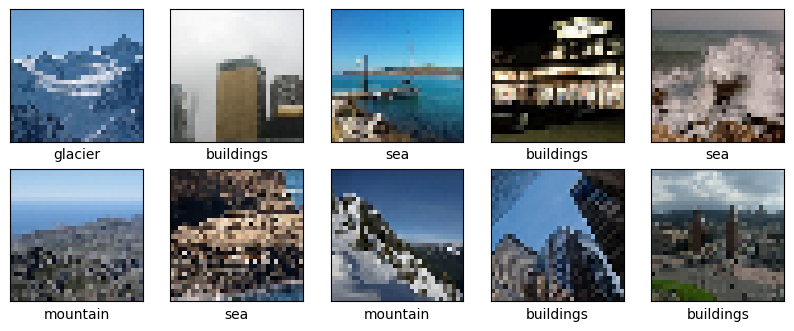

In [8]:
display_examples(class_names, X_train, y_train)

### Normalize Data

In [9]:
print(X_train[0].max())
print(X_train[0].min())

# valores iniciais do X_train
print(X_train[0])

248
1
[[[173 173 173]
  [173 173 173]
  [172 172 172]
  ...
  [175 175 175]
  [177 177 177]
  [180 180 180]]

 [[202 202 202]
  [194 194 194]
  [192 192 192]
  ...
  [211 211 211]
  [213 213 213]
  [206 206 206]]

 [[227 227 227]
  [217 217 217]
  [212 212 212]
  ...
  [208 208 208]
  [207 207 207]
  [206 206 206]]

 ...

 [[ 75  75  75]
  [ 38  38  38]
  [ 81  81  81]
  ...
  [ 74  74  74]
  [ 43  43  43]
  [ 39  39  39]]

 [[ 61  61  61]
  [ 66  66  66]
  [ 54  54  54]
  ...
  [ 76  76  76]
  [ 79  79  79]
  [ 75  75  75]]

 [[ 82  82  82]
  [ 81  81  81]
  [ 88  88  88]
  ...
  [ 72  72  72]
  [ 47  47  47]
  [ 67  67  67]]]


In [10]:
X_train = X_train/255.0
X_test = X_test/255.0

print(X_train[0].max())
print(X_train[0].min())
print(X_train[0])

0.9725490196078431
0.00392156862745098
[[[0.67843137 0.67843137 0.67843137]
  [0.67843137 0.67843137 0.67843137]
  [0.6745098  0.6745098  0.6745098 ]
  ...
  [0.68627451 0.68627451 0.68627451]
  [0.69411765 0.69411765 0.69411765]
  [0.70588235 0.70588235 0.70588235]]

 [[0.79215686 0.79215686 0.79215686]
  [0.76078431 0.76078431 0.76078431]
  [0.75294118 0.75294118 0.75294118]
  ...
  [0.82745098 0.82745098 0.82745098]
  [0.83529412 0.83529412 0.83529412]
  [0.80784314 0.80784314 0.80784314]]

 [[0.89019608 0.89019608 0.89019608]
  [0.85098039 0.85098039 0.85098039]
  [0.83137255 0.83137255 0.83137255]
  ...
  [0.81568627 0.81568627 0.81568627]
  [0.81176471 0.81176471 0.81176471]
  [0.80784314 0.80784314 0.80784314]]

 ...

 [[0.29411765 0.29411765 0.29411765]
  [0.14901961 0.14901961 0.14901961]
  [0.31764706 0.31764706 0.31764706]
  ...
  [0.29019608 0.29019608 0.29019608]
  [0.16862745 0.16862745 0.16862745]
  [0.15294118 0.15294118 0.15294118]]

 [[0.23921569 0.23921569 0.23921569

### Dataset statistics

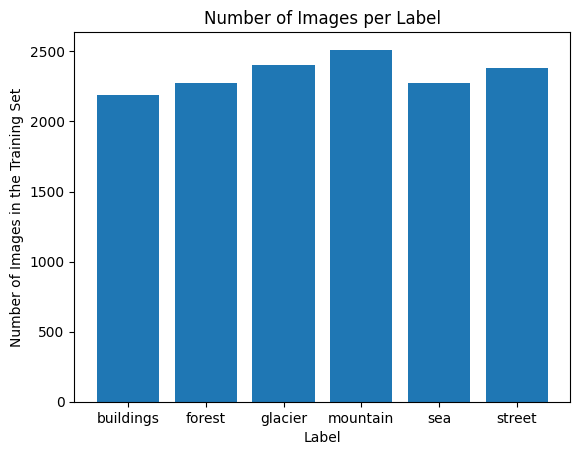

In [11]:
_, train_counts = np.unique(y_train, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)

# Plot the number of images per label
plt.bar(class_names, train_counts )
plt.xlabel('Label')
plt.ylabel('Number of Images in the Training Set')
plt.title('Number of Images per Label')
plt.show()



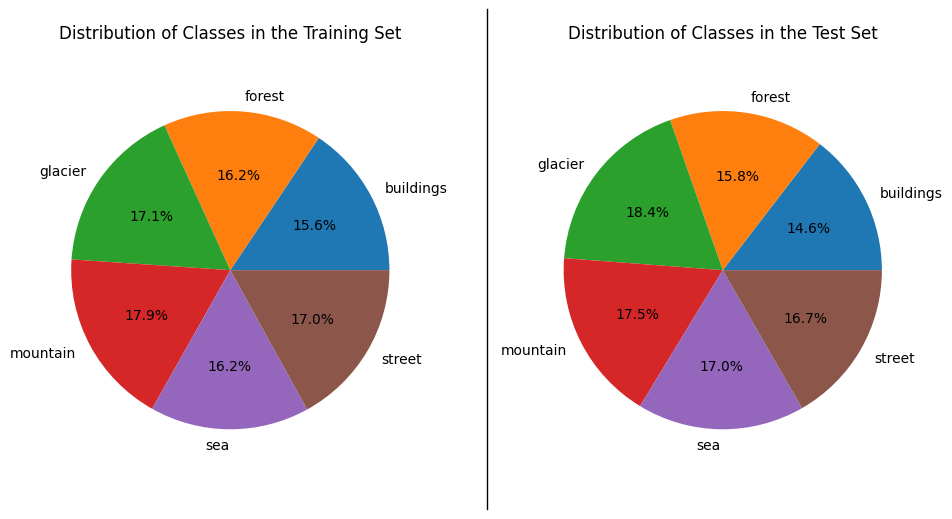

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5)) 
fig.subplots_adjust(wspace=50)  # Ajuste o espaço entre os gráficos

axs[0].pie(train_counts,
           explode=(0, 0, 0, 0, 0, 0),
           labels=class_names,
           autopct='%1.1f%%')
axs[0].axis('equal')

axs[1].pie(test_counts,
           explode=(0, 0, 0, 0, 0, 0),
           labels=class_names,
           autopct='%1.1f%%')
axs[1].axis('equal')

axs[0].set_title('Distribution of Classes in the Training Set')
axs[1].set_title('Distribution of Classes in the Test Set')

fig.canvas.draw()  
xline = 0.5 * (axs[0].get_position().x1 + axs[1].get_position().x0)
line = plt.Line2D([xline, xline], [0, 1], transform=fig.transFigure, color='black', linewidth=1)
fig.add_artist(line)

plt.tight_layout()
plt.show()